Владимир Кирилкин ПИ18-2

ML 1.1. Парная регрессия
https://docs.google.com/document/d/1qaXgiv23dXfOFehqAvmnZQRa4DhyZbZKL-_Lhdm_UrM/edit#heading=h.idhu9pwd95kf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')
usd = pd.read_csv('data/USDRUB_101001_171001.txt')
yndx = pd.read_csv("data/YNDX_101001_171001.txt")

In [5]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [3]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [4]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

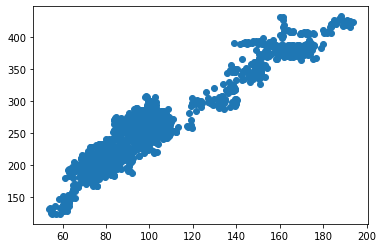

In [8]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [5]:
from random import shuffle

class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        """Среднеквадратическое отклонение"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    @staticmethod
    def _split( x, y, teach_size):
        length = len(x)
        teach = int(length * teach_size)
        ind = [i for i in range(length)]
        shuffle(ind)
        teach_ind = ind[:teach]
        test_ind = ind[teach:]
        return x[teach_ind], y[teach_ind], x[test_ind], y[test_ind]

    def BGD(self, x, y, alpha=0.000005, accuracy=0.01, teach_size=None):
        if teach_size is not None:
            x, y, test_x, test_y = self._split(x, y, teach_size)
        else:
            test_x, test_y = 0, 0
        steps, errors, test_err = [], [], []
        step = 0
        old_err = hyp.error(x, y)
        new_err = hyp.error(x, y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(x) - y) /len(x)
            dJ1 = sum((self.predict(x) - y) * x) /len(x)

            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = hyp.error(x, y)
            dJ = old_err - new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
            test_err.append(hyp.error(test_x, test_y))
            if step > 1000: break
        return steps, errors, test_err if teach_size is not None else None


In [6]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 754518.5925656324


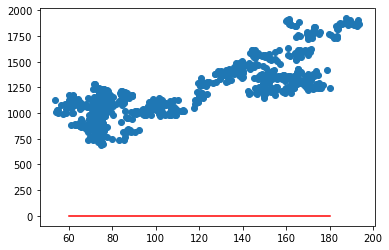

In [7]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 298.8050391789875


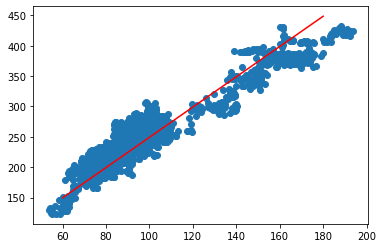

In [12]:
hyp = hypothesis()
steps, errors, _ = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)


X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

### сбер × яндекс
Размер случайной обучающей выборки 80%


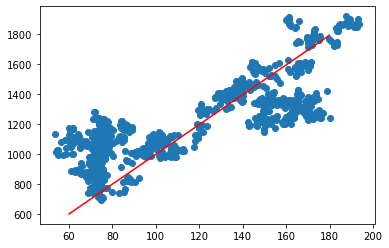

In [12]:
res = pd.merge(sber, yndx, on='<DATE>')

x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

hyp = hypothesis()
steps, errors, test_errors = hyp.BGD(x, y, teach_size=0.8)


X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

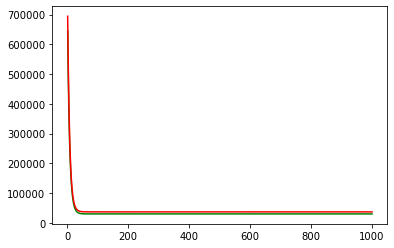

In [9]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.plot(steps, test_errors, 'r')
plt.show()

Для того чтобы увидеть разницу ошибки между обучающей выборкой и тестовой нужно взять кусок графика поменьше


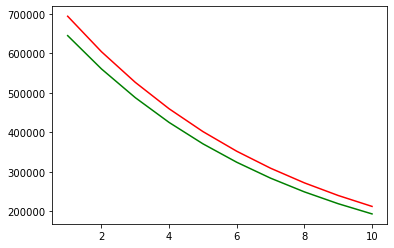

In [10]:
lim = 10
plt.figure()
plt.plot(steps[:lim], errors[:lim], 'g')
plt.plot(steps[:lim], test_errors[:lim], 'r')
plt.show()

# sklearn

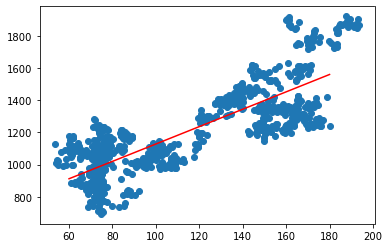

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x_v = x.values
y_v = y.values

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=110, tol=1e-1))
reg.fit(x_v.reshape(-1, 1), y_v)

X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0.reshape(-1,1))
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Сравнение регрессий самописной (зеленой) и sklearn (красной)

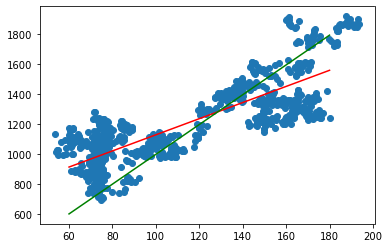

In [14]:
X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0.reshape(-1,1))
X1 = np.linspace(60, 180, 100)
Y1 = hyp.predict(X1)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.plot(X1, Y1, 'g')
plt.show()